<a href="https://colab.research.google.com/github/mayuripandey/Data-Analysis/blob/main/bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install twarc
!pip install twarc-csv
!twarc2 configure

In [2]:
import numpy as np
# Visualization
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt


In [3]:
!twarc2 conversation 1534906387599396866 conversation.jsonl

100% 604770000/604770000 [01:22<00:00, 7289271.54it/s]


In [ ]:
!twarc2 csv conversation.jsonl conversation.csv

In [ ]:
import pandas as pd
df=pd.read_csv('conversation.csv')
df

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

# Lets do some text cleanup
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
    text: a string
    return: modified initial string
    """
    # lowercase text
    text = text.lower() 
    #remove usernames
    text = re.sub('@[^\s]+','',text)

    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    
    # Remove the XXXX values
    text = text.replace('x', '') 
    
    # Remove white space
    text = REMOVE_NUM.sub('', text)

    #  delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('', text) 

    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    
    # removes any words composed of less than 2 or more than 21 letters
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

In [ ]:
df["cleaned"] = df["text"].apply(clean_text)
df


In [8]:
df.shape

(8859, 75)

In [9]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

# Download model
model1 = SentenceTransformer('all-mpnet-base-v2')
model2 = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
model3 = SentenceTransformer('multi-qa-mpnet-base-dot-v1')
model4 = SentenceTransformer('distiluse-base-multilingual-cased-v2')

  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/968 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/645 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/471M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.40k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/610 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/531 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

In [10]:
model_embeddings1 = model1.encode(df['cleaned'].tolist())
model_embeddings2 = model2.encode(df['cleaned'].tolist())
model_embeddings3 = model3.encode(df['cleaned'].tolist())
model_embeddings4 = model4.encode(df['cleaned'].tolist())

In [11]:
!!pip install umap-learn[plot]
import umap
umap_embeddings1 = umap.UMAP(n_neighbors=15,
                            n_components=5,
                            metric='cosine').fit_transform(model_embeddings1)
umap_embeddings2 = umap.UMAP(n_neighbors=15,
                            n_components=5,
                            metric='cosine').fit_transform(model_embeddings2)
umap_embeddings3 = umap.UMAP(n_neighbors=15,
                            n_components=5,
                            metric='cosine').fit_transform(model_embeddings3)
umap_embeddings4 = umap.UMAP(n_neighbors=15,
                            n_components=5,
                            metric='cosine').fit_transform(model_embeddings4)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [12]:
!pip install hdbscan
import hdbscan
from scipy.spatial.distance import correlation
cluster_model1= hdbscan.HDBSCAN(min_cluster_size=15,
                         min_samples=1,
                         alpha=1.5,
                         metric='correlation',
                         cluster_selection_method = 'eom').fit(umap_embeddings1)

cluster_model2= hdbscan.HDBSCAN(min_cluster_size=15,
                         min_samples=1,
                         alpha=1.5,
                         metric='correlation',
                         cluster_selection_method = 'eom').fit(umap_embeddings2)


cluster_model3= hdbscan.HDBSCAN(min_cluster_size=15,
                         min_samples=1,
                         alpha=1.5,
                         metric='correlation',
                         cluster_selection_method = 'eom').fit(umap_embeddings3)



cluster_model4= hdbscan.HDBSCAN(min_cluster_size=15,
                         min_samples=1,
                         alpha=1.5,
                         metric='correlation',
                         cluster_selection_method = 'eom').fit(umap_embeddings4)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342169 sha256=b28a5b604e5d5d90d736e1d45c44aa8885b8fd51d1d2bc366fae9d0d995d05a8
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [17]:
df['posx1'],df['posy1'] = umap_embeddings1[:,0], umap_embeddings1[:,1]
df['posx2'],df['posy2'] = umap_embeddings2[:,0], umap_embeddings2[:,1]
df['posx3'],df['posy3']= umap_embeddings2[:,0], umap_embeddings2[:,1]
df['posx4'],df['posy4']= umap_embeddings2[:,0], umap_embeddings2[:,1]

In [18]:
df['cluster1']= cluster_model1.labels_
df['cluster2']= cluster_model2.labels_
df['cluster3']= cluster_model3.labels_
df['cluster4']= cluster_model3.labels_

In [ ]:
df

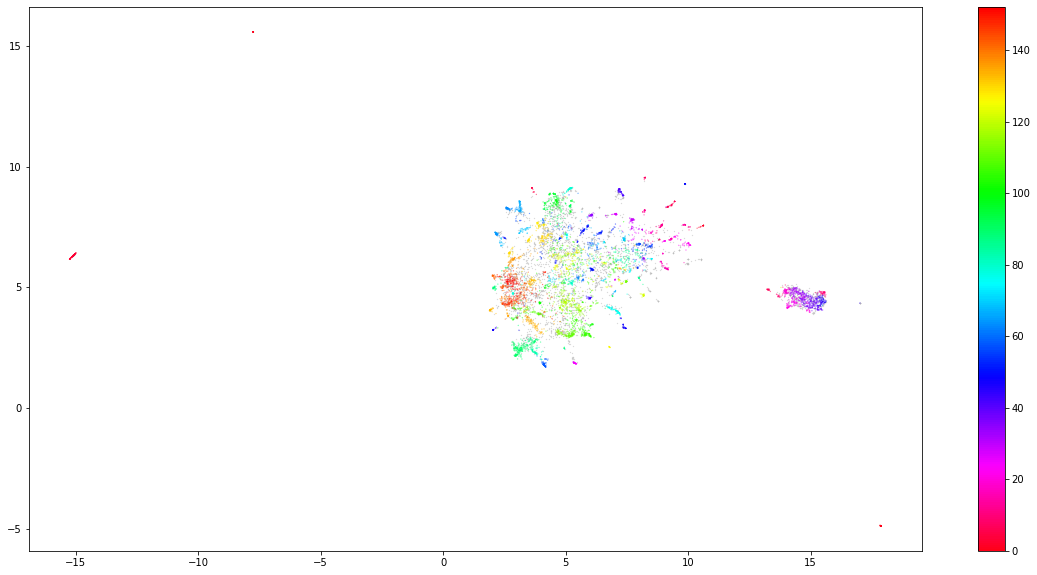

In [19]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(model_embeddings1)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster_model1.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

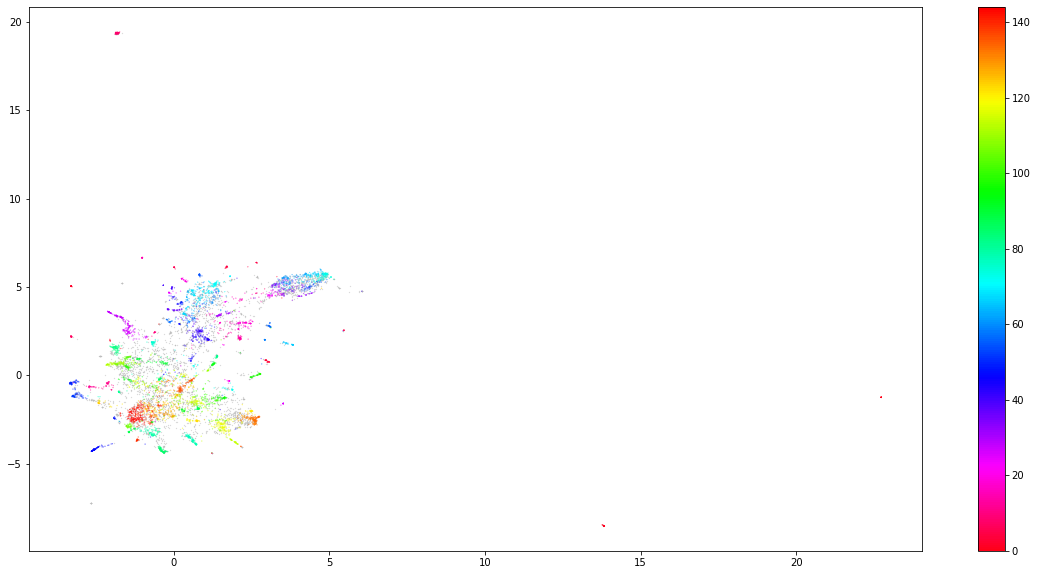

In [20]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(model_embeddings2)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster_model2.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

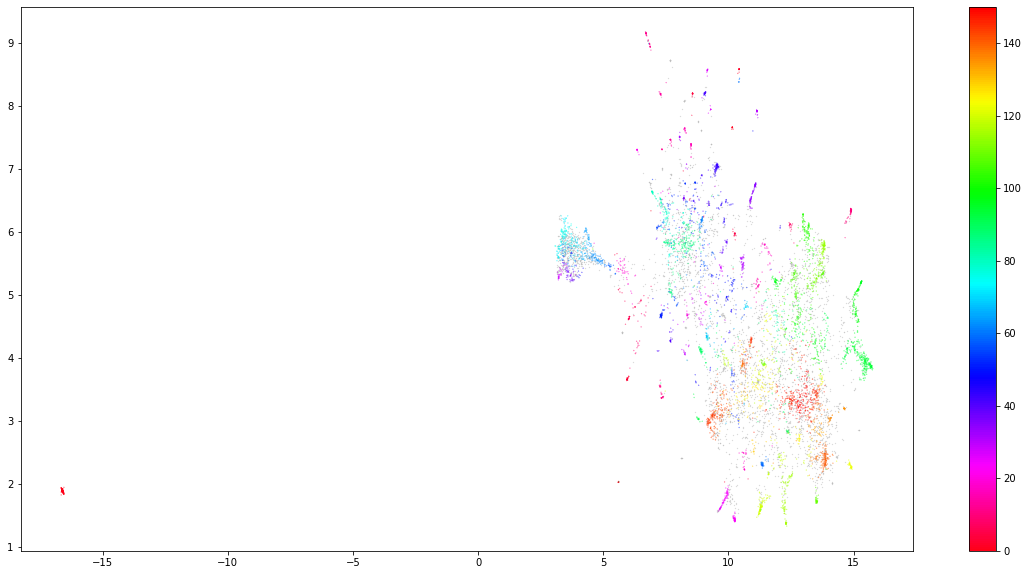

In [21]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(model_embeddings3)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster_model3.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

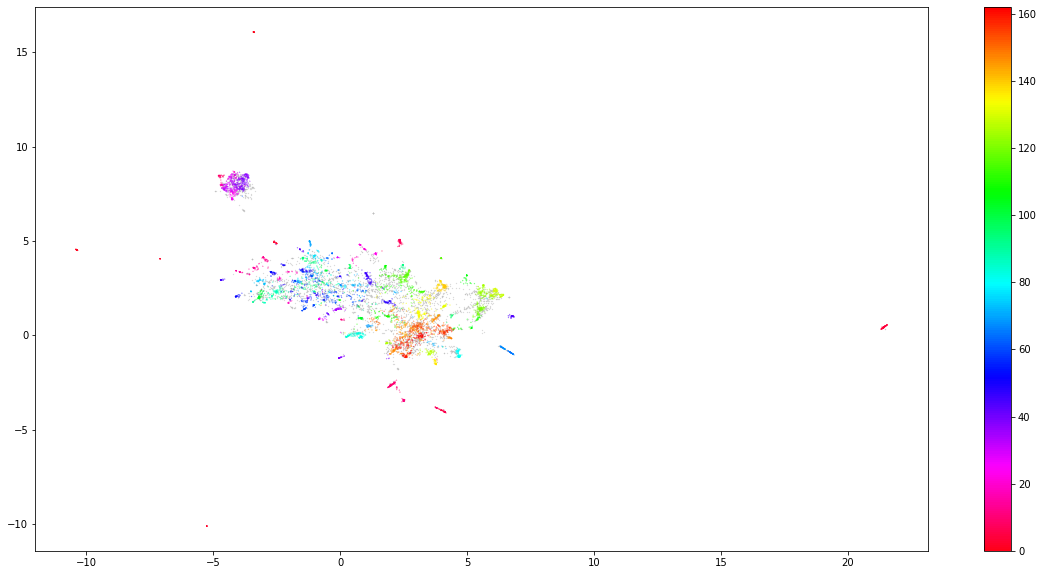

In [22]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(model_embeddings4)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster_model4.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

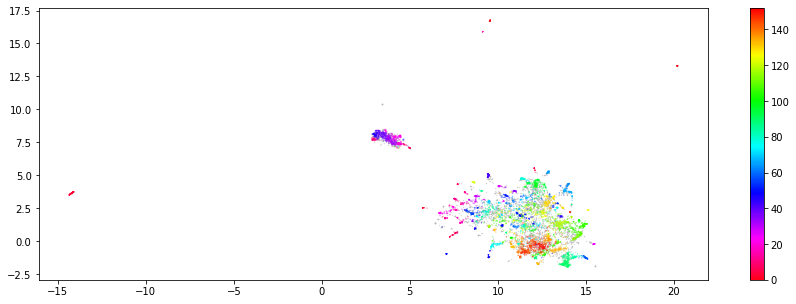

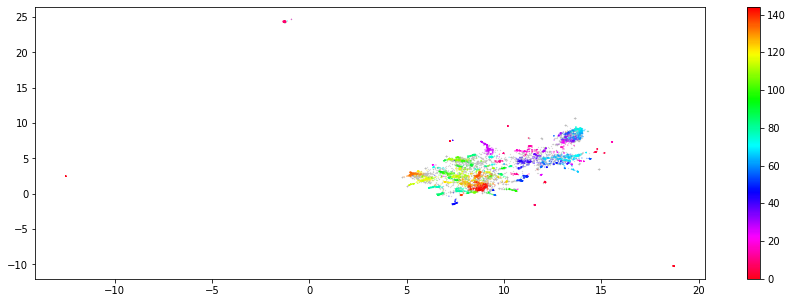

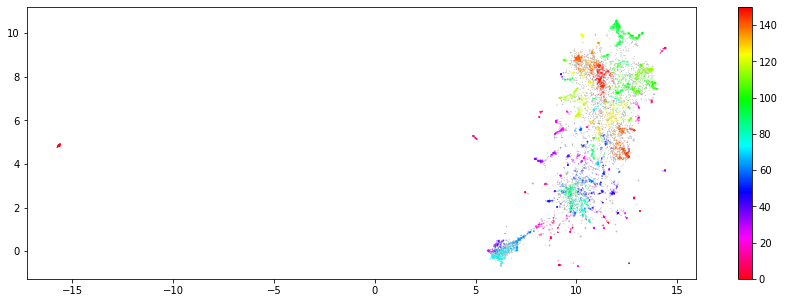

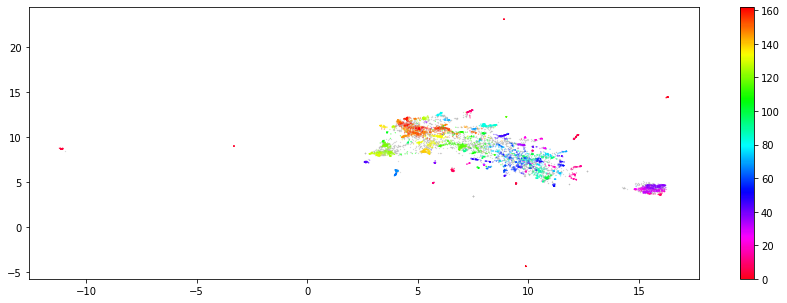

In [23]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(model_embeddings1)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster_model1.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(1, 1))
fig.set_figheight(5)
fig.set_figwidth(15)
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(model_embeddings2)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster_model2.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(1, 1))
fig.set_figheight(5)
fig.set_figwidth(15)
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(model_embeddings3)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster_model3.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(1, 1))
fig.set_figheight(5)
fig.set_figwidth(15)
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(model_embeddings4)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster_model4.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(1, 1))
fig.set_figheight(5)
fig.set_figwidth(15)
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [24]:
!pip install bertopic
from bertopic import BERTopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 2.8 MB/s 
     |████████████████████████████████| 636 kB 10.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [25]:
model1 = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probabilities = model1.fit_transform(df['cleaned'],model_embeddings1)

model2 = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probabilities = model2.fit_transform(df['cleaned'],model_embeddings2)

model3 = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probabilities = model3.fit_transform(df['cleaned'],model_embeddings3)

model4 = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probabilities = model4.fit_transform(df['cleaned'],model_embeddings4)

2022-06-13 11:43:58,338 - BERTopic - Reduced dimensionality
2022-06-13 11:44:11,637 - BERTopic - Clustered reduced embeddings
2022-06-13 11:44:40,242 - BERTopic - Reduced dimensionality
2022-06-13 11:44:48,523 - BERTopic - Clustered reduced embeddings
2022-06-13 11:45:18,957 - BERTopic - Reduced dimensionality
2022-06-13 11:45:29,996 - BERTopic - Clustered reduced embeddings
2022-06-13 11:45:57,528 - BERTopic - Reduced dimensionality
2022-06-13 11:46:07,683 - BERTopic - Clustered reduced embeddings


In [26]:
freq1 = model1.get_topic_info(); freq1.head(5)


,Topic,Count,Name
0,-1,3159,-1_gun_peopl_shoot_get
1,0,1020,0_http_tco_wireless_hey
2,1,227,1_law_crimin_enforc_stop
3,2,217,2_flag_red_law_unconstitut
4,3,169,3____


In [23]:
freq2 = model2.get_topic_info(); freq2.head(5)


,Topic,Count,Name
0,-1,2243,-1_gun_peopl_want_go
1,0,898,0_http_tco_cricket_ad
2,1,560,1_flag_red_law_process
3,2,145,2_ratio_british_repli_hang
4,3,135,3_eactli_agre_eplain_round


In [24]:
freq3 = model3.get_topic_info(); freq3.head(5)

,Topic,Count,Name
0,-1,2654,-1_gun_law_peopl_get
1,0,812,0_http_tco_ad_read
2,1,263,1_hood_fort_parkland_ft
3,2,163,2_biden_trump_vaccin_covid
4,3,132,3____


In [25]:
freq4 = model4.get_topic_info(); freq4.head(5)

,Topic,Count,Name
0,-1,1807,-1_peopl_presid_go_biden
1,0,703,0_http_tco_pm_et
2,1,528,1_flag_red_law_process
3,2,511,2_gun_crimin_shoot_firearm
4,3,153,3_law_enforc_crimin_alreadi


In [26]:
model1.visualize_topics()

In [27]:
model2.visualize_topics()

In [28]:
model3.visualize_topics()

In [29]:
model4.visualize_topics()

In [32]:
model1.visualize_distribution(probabilities[2])

In [33]:
model2.visualize_distribution(probabilities[2])

In [34]:
model3.visualize_distribution(probabilities[2])

In [35]:
model4.visualize_distribution(probabilities[2])

In [36]:
model1.visualize_heatmap(n_clusters=20, width=1000, height=1000)
model2.visualize_heatmap(n_clusters=20, width=1000, height=1000)

Corelating models

In [37]:
frequency1= model1.get_topic_info()
frequency2=model2.get_topic_info()

In [38]:
import pandas as pd
df1 = pd.DataFrame(frequency1)
df1

,Topic,Count,Name
0,-1,2555,-1_gun_law_peopl_shoot
1,0,834,0_http_tco_wireless_cricket
2,1,150,1_flag_red_law_unconstitut
3,2,140,2_biden_joe_trump_presid
4,3,137,3_hood_fort_terrorist_ft
...,...,...,...
97,96,11,96_liter_fraction_per_shithol
98,97,11,97_someth_wring_fuck_write
99,98,10,98_jefferson_thoma_letter_armsn
100,99,10,99_someon_threaten_threat_choic


In [39]:
import pandas as pd
df2 = pd.DataFrame(frequency2)
df2

,Topic,Count,Name
0,-1,2243,-1_gun_peopl_want_go
1,0,898,0_http_tco_cricket_ad
2,1,560,1_flag_red_law_process
3,2,145,2_ratio_british_repli_hang
4,3,135,3_eactli_agre_eplain_round
...,...,...,...
99,106,12,106_meme_pictur_confus_committe
98,102,12,102_fjb_fk_ensur_benelli
108,107,11,107_smartest_guy_know_man
109,108,11,108_lmfao_bs_lmb_lmaoo


In [40]:

df3 = pd.DataFrame().assign(Topic=df1["Topic"],Topic_model1=df1['Count'], Topic_model2=df2['Count'].astype(int))
df3


,Topic,Topic_model1,Topic_model2
0,-1,2555,2243
1,0,834,898
2,1,150,560
3,2,140,145
4,3,137,135
...,...,...,...
97,96,11,13
98,97,11,12
99,98,10,12
100,99,10,12


In [41]:
df4=pd.concat([df1,df2],axis=1)
df4



df4.to_csv('simialr.csv')




In [42]:
cols = []
count = 1
for column in df4.columns:
    if column == 'Name':
        cols.append(f'Name_{count}')
        count+=1
        continue
    cols.append(column)
df4.columns = cols


cols = []
count = 1
for column in df4.columns:
    if column == 'Topic':
        cols.append(f'Topic_{count}')
        count+=1
        continue
    cols.append(column)
df4.columns = cols
df4

,Topic_1,Count,Name_1,Topic_2,Count,Name_2
0,-1.0,2555.0,-1_gun_law_peopl_shoot,-1,2243,-1_gun_peopl_want_go
1,0.0,834.0,0_http_tco_wireless_cricket,0,898,0_http_tco_cricket_ad
2,1.0,150.0,1_flag_red_law_unconstitut,1,560,1_flag_red_law_process
3,2.0,140.0,2_biden_joe_trump_presid,2,145,2_ratio_british_repli_hang
4,3.0,137.0,3_hood_fort_terrorist_ft,3,135,3_eactli_agre_eplain_round
...,...,...,...,...,...,...
106,NaN,NaN,NaN,98,12,98_nba_mlbtheshow_mlbfreeagenc_ukrainewar
107,NaN,NaN,NaN,97,12,97_someon_kill_cancer_racensecond
108,NaN,NaN,NaN,107,11,107_smartest_guy_know_man
109,NaN,NaN,NaN,108,11,108_lmfao_bs_lmb_lmaoo


In [43]:
df4['Model1_list'] =  df4['Name_1'].str.split("_")
df4['Model2_list'] =  df4['Name_2'].str.split("_")
df4 = df4.fillna("null")
a = []
for i in range(0, len(df4)):
    a.append(len(set(df4['Model1_list'].iloc[i]).intersection(df4['Model2_list'].iloc[i])))
df4['Intersection'] = a


b = []
for i in range (0, len(df4)):
 b.append(len(set(df4['Model1_list'].iloc[i]).union(df4['Model2_list'].iloc[i])))
df4['Union'] = b
df4["Similarity"] = df4["Intersection"].div(df4["Union"].values)
df4['Topic_model'] = 'Topic-' + df4['Topic_1'].astype(str)
df4

,Topic_1,Count,Name_1,Topic_2,Count,Name_2,Model1_list,Model2_list,Intersection,Union,Similarity,Topic_model
0,-1.0,2555.0,-1_gun_law_peopl_shoot,-1,2243,-1_gun_peopl_want_go,"[-1, gun, law, peopl, shoot]","[-1, gun, peopl, want, go]",3,7,0.428571,Topic--1.0
1,0.0,834.0,0_http_tco_wireless_cricket,0,898,0_http_tco_cricket_ad,"[0, http, tco, wireless, cricket]","[0, http, tco, cricket, ad]",4,6,0.666667,Topic-0.0
2,1.0,150.0,1_flag_red_law_unconstitut,1,560,1_flag_red_law_process,"[1, flag, red, law, unconstitut]","[1, flag, red, law, process]",4,6,0.666667,Topic-1.0
3,2.0,140.0,2_biden_joe_trump_presid,2,145,2_ratio_british_repli_hang,"[2, biden, joe, trump, presid]","[2, ratio, british, repli, hang]",1,9,0.111111,Topic-2.0
4,3.0,137.0,3_hood_fort_terrorist_ft,3,135,3_eactli_agre_eplain_round,"[3, hood, fort, terrorist, ft]","[3, eactli, agre, eplain, round]",1,9,0.111111,Topic-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,null,null,null,98,12,98_nba_mlbtheshow_mlbfreeagenc_ukrainewar,null,"[98, nba, mlbtheshow, mlbfreeagenc, ukrainewar]",0,8,0.000000,Topic-null
107,null,null,null,97,12,97_someon_kill_cancer_racensecond,null,"[97, someon, kill, cancer, racensecond]",0,8,0.000000,Topic-null
108,null,null,null,107,11,107_smartest_guy_know_man,null,"[107, smartest, guy, know, man]",0,8,0.000000,Topic-null
109,null,null,null,108,11,108_lmfao_bs_lmb_lmaoo,null,"[108, lmfao, bs, lmb, lmaoo]",0,8,0.000000,Topic-null


In [48]:
df5 = df4[['Topic_model', 'Similarity']].copy()
df5

,Topic_model,Similarity
0,Topic--1.0,0.428571
1,Topic-0.0,0.666667
2,Topic-1.0,0.666667
3,Topic-2.0,0.111111
4,Topic-3.0,0.111111
...,...,...
106,Topic-null,0.000000
107,Topic-null,0.000000
108,Topic-null,0.000000
109,Topic-null,0.000000


In [59]:
newdf= (df4.pivot(index='Topic_2',columns='Topic_1', values='Similarity').fillna(0))

newdf
newdf.style.background_gradient(cmap='coolwarm')


In [193]:
pd.crosstab(df4.Topic_model,df4.Topic_model, ).astype(bool)

Topic_model,Topic--1,Topic-0,Topic-1,Topic-10,Topic-11,Topic-12,Topic-13,Topic-14,Topic-15,Topic-16,...,Topic-30,Topic-31,Topic-32,Topic-33,Topic-4,Topic-5,Topic-6,Topic-7,Topic-8,Topic-9
Topic_model,,,,,,,,,,,,,,,,,,,,,
Topic--1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Topic-0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Topic-1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Topic-10,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Topic-11,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Topic-12,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Topic-13,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Topic-14,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Topic-15,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
